## Prerequisites
Let's import the required libraries that we need for processing the data, visulaisation and machine learning algortthms.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
This is our dataset,the famous palmer penguins. The goal of palmer penguins is to provide a great dataset for data exploration & visualization, as an alternative to iris. Official page of the dataset is [here](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md)

In [2]:
df = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


It seems that the features are:
- Sex
- Culmen Length (mm)
- Culmen Depth (mm)
- Flipper Length (mm)
- Body Mass (g)
- Island

And the target is the species

This is a classification problem

## Picture of culmen
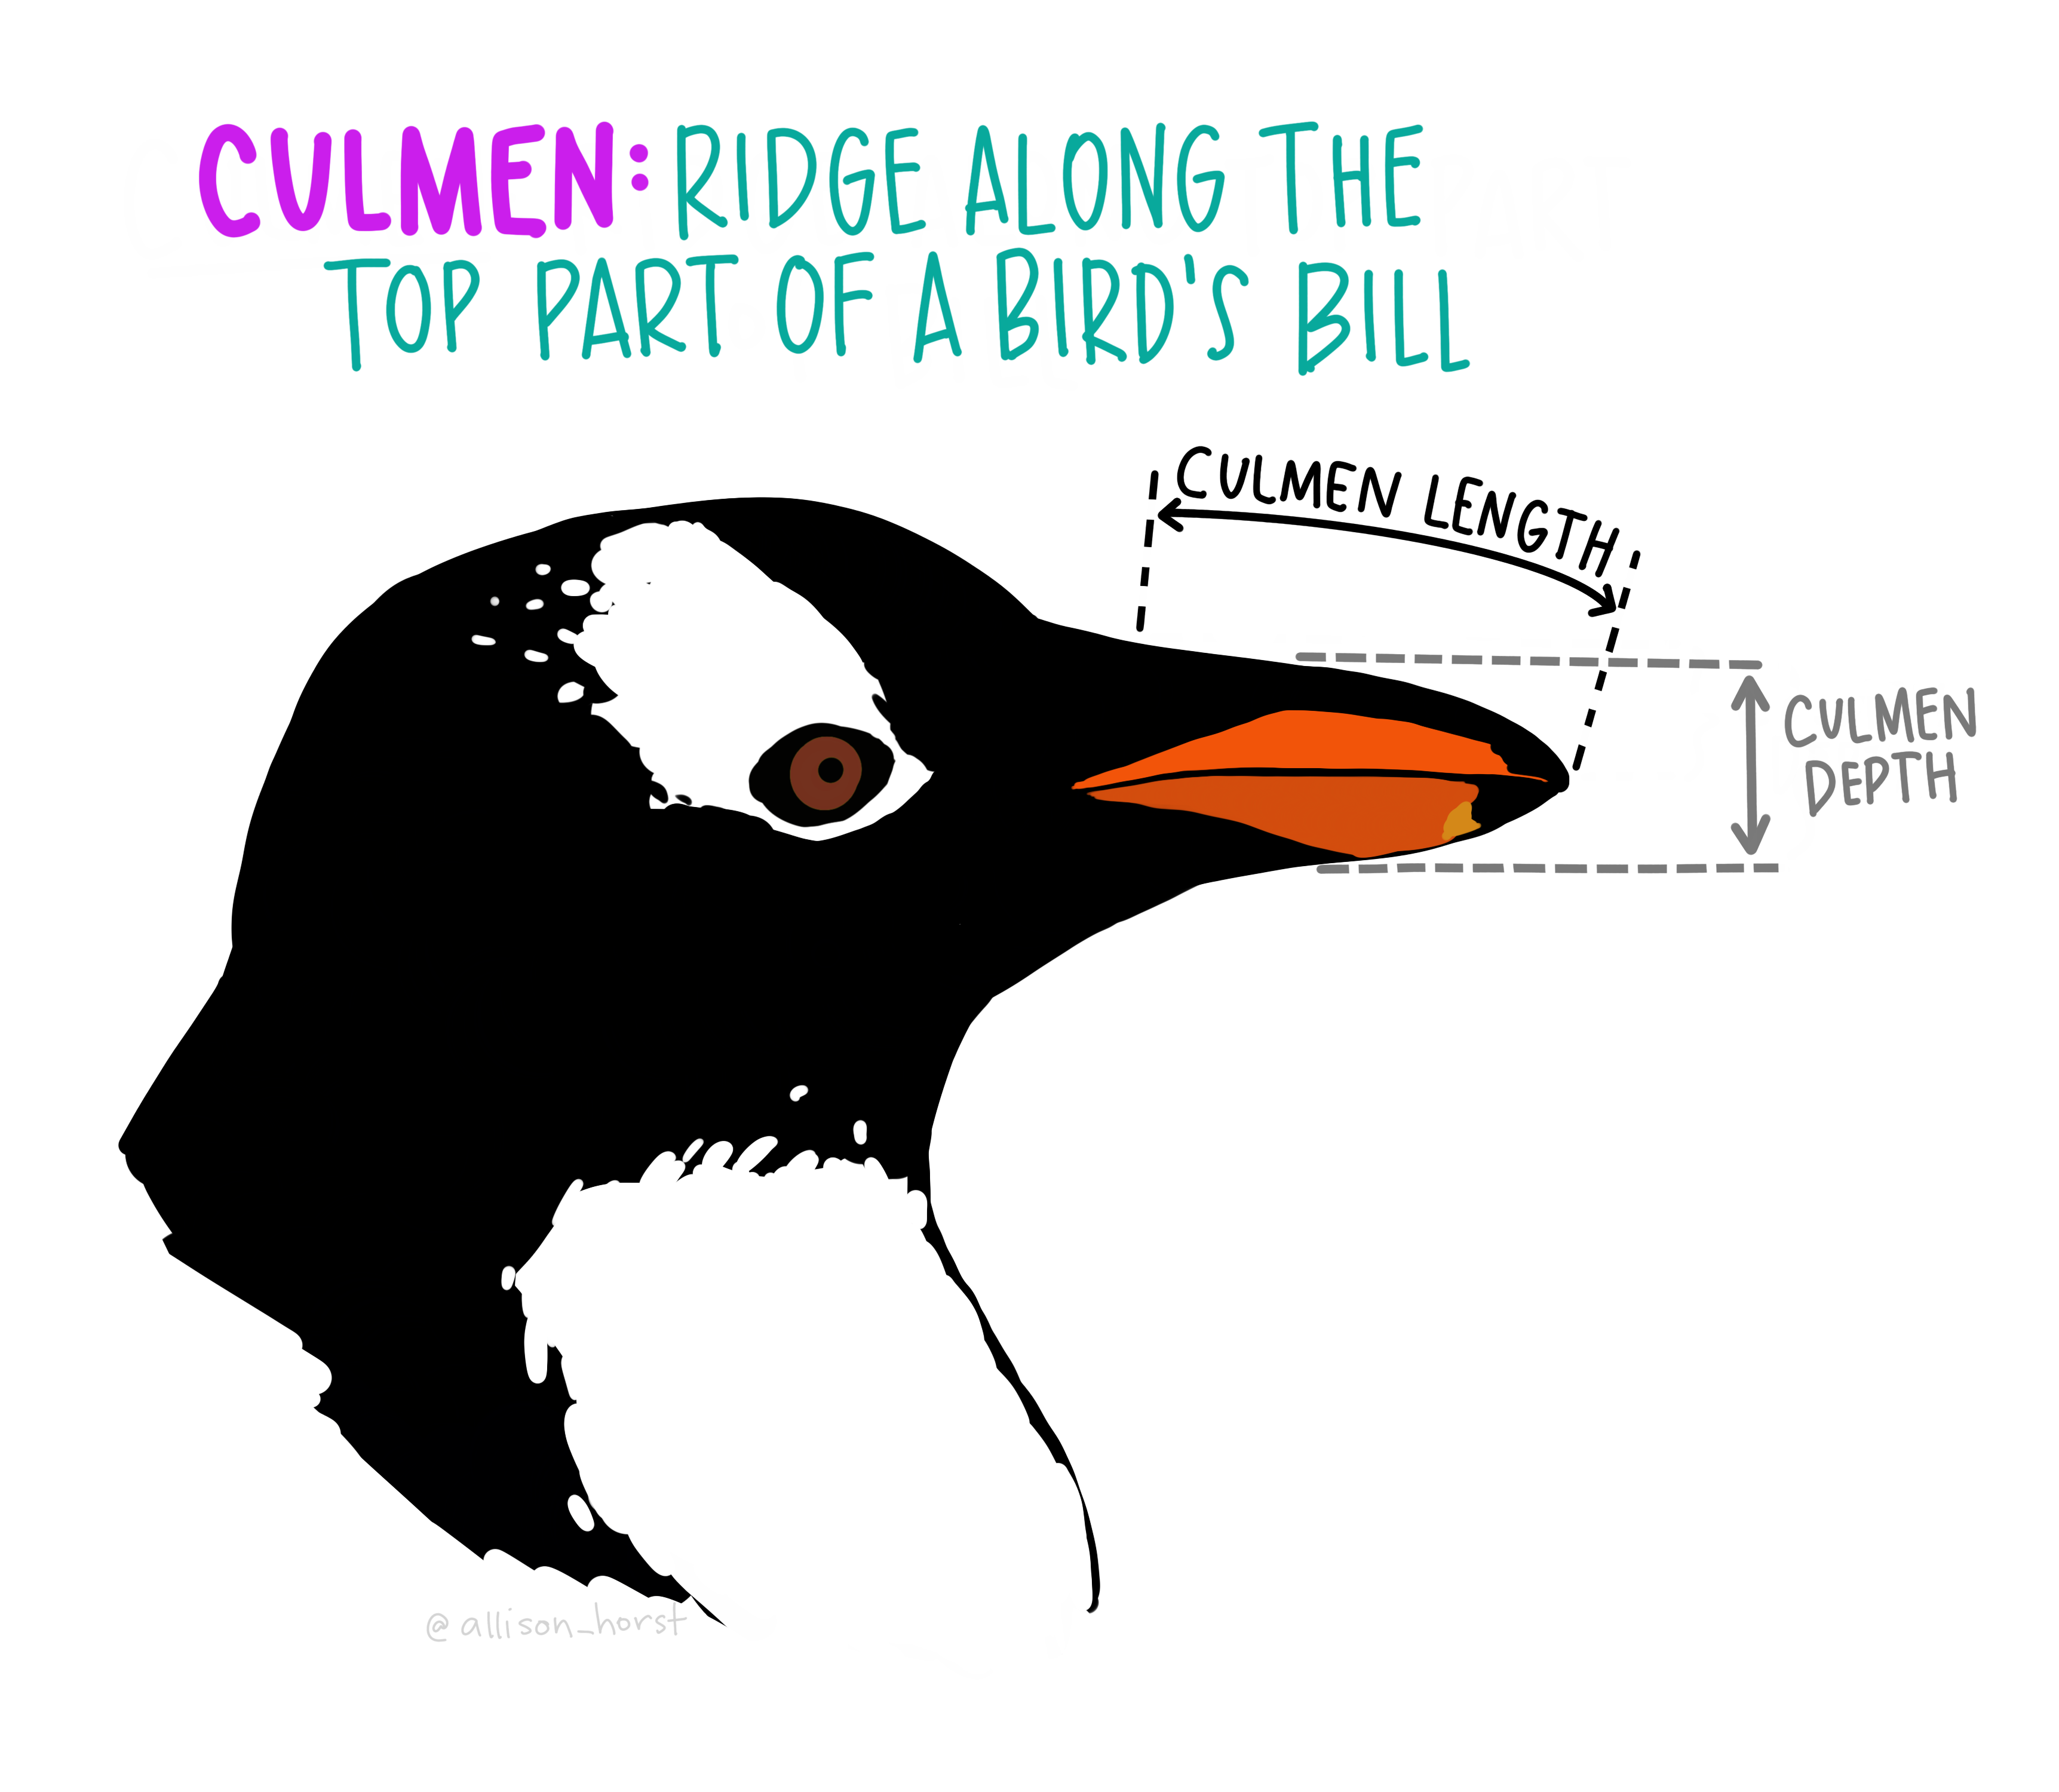

## Picture of a penguin
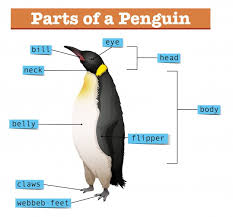

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
print('Dataset has', df.shape[0] , 'rows and', df.shape[1], 'columns')

Dataset has 344 rows and 7 columns


In [5]:
print(df.shape)

(344, 7)


In [6]:
# statitistical description of the data
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


It is strange that we have 3 genders, we need to investigate this issue.

In [7]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

Let's replace the '.' with nan and treat as non-value

In [8]:
df['sex'] = df['sex'].replace('.', np.nan)

Now everything looks better

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

Let's add some plots (bo-plots and pair-plots) to understand better the variables distribution.

## Box plots

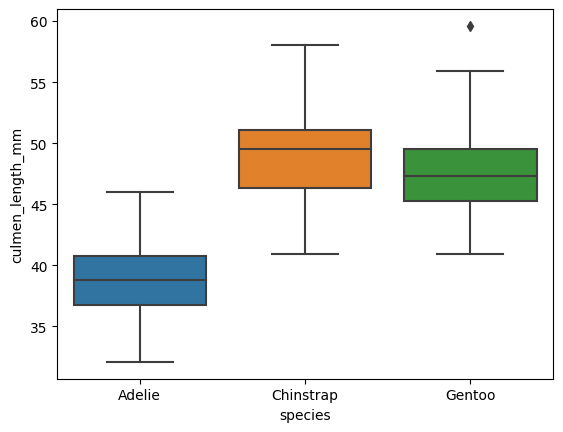

In [10]:
sns.boxplot(x = 'species', y='culmen_length_mm', data = df)
plt.show()

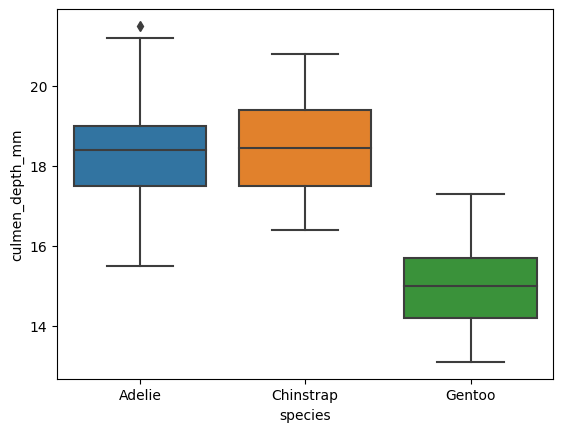

In [11]:
sns.boxplot(x = 'species', y='culmen_depth_mm', data = df)
plt.show()

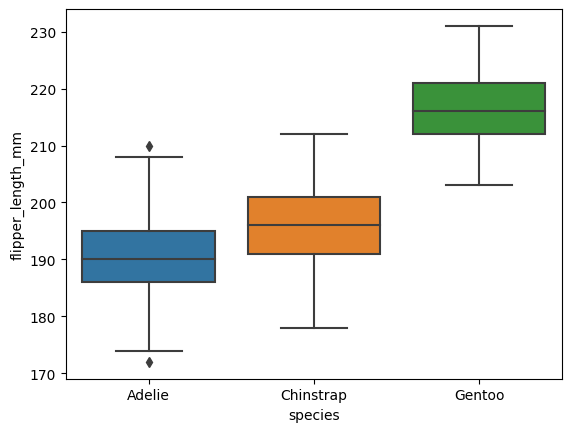

In [12]:
sns.boxplot(x = 'species', y='flipper_length_mm', data = df)
plt.show()

## Pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

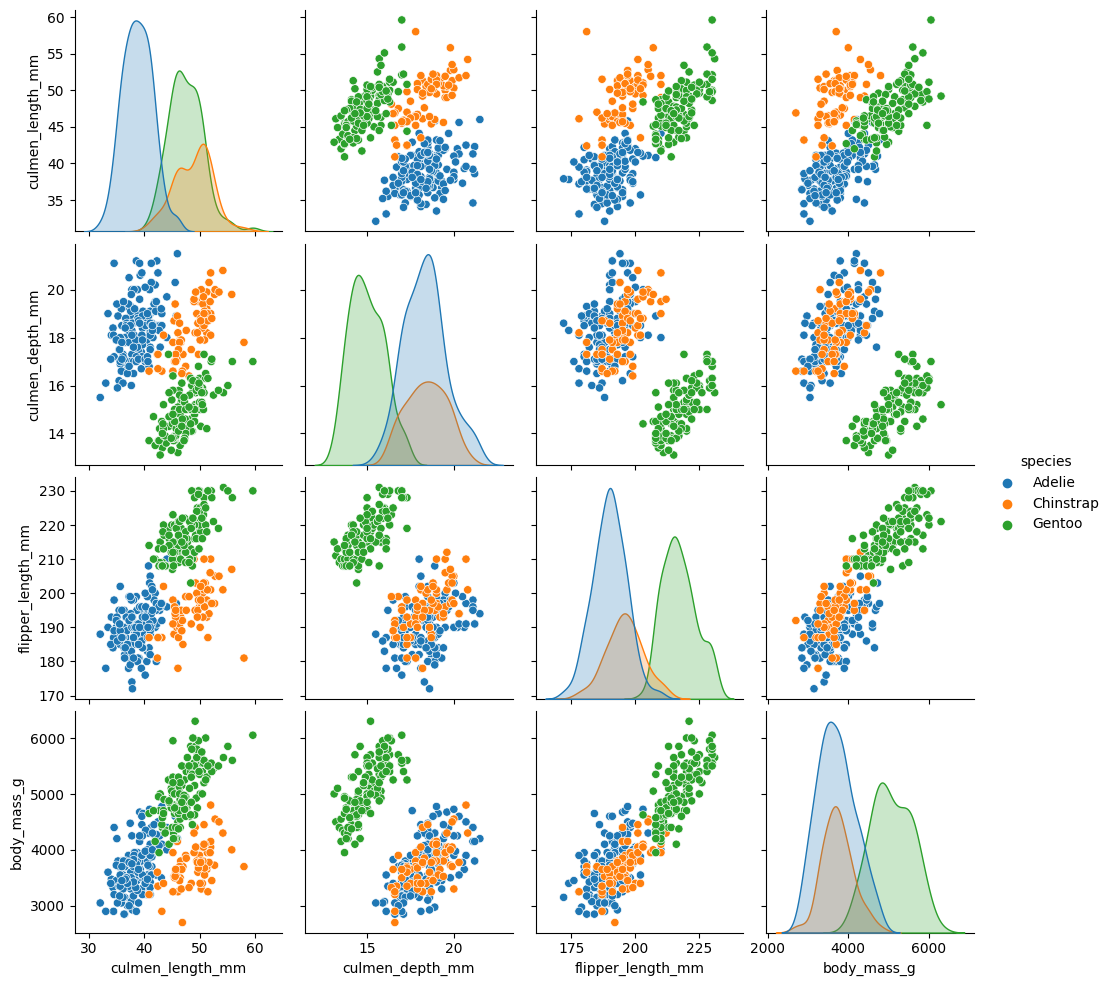

In [13]:
sns.pairplot(df, hue = 'species')
plt.show()

Findings:

Color Coding: The species are color-coded: Adelie (blue), Gentoo (green), and Chinstrap (orange)

Diagonal Plots (Distributions)\
Bill Length: Adelie penguins generally have shorter bill lengths compared to Gentoo and Chinstrap.\
Bill Depth: Gentoo penguins tend to have shorter bills than the other two species.\
Flipper Length: Gentoo penguins have significantly longer flippers than both Adelie and Chinstrap.\
Body Mass: Gentoo penguins are generally heavier than the other species.

Scatterplots (Relationships)\
Bill Length vs. Bill Depth: There is a clear separation between species, with Adelie showing distinct characteristics.\
Flipper Length vs. Body Mass: A positive correlation is evident, especially for Gentoo penguins, indicating that as flipper length increases, body mass also tends to increase.

General Observations\
Clusters and Separation: The plot reveals clear clusters for each species, especially in the scatterplots involving bill dimensions and flipper length.\
Outliers: There are few outliers visible, indicating that most data points fall within expected ranges for each species.

This is a helper function that we found from another notebook

## Missing Values

In [14]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


Since the missing values are negligible in number, let's use the most common imputation strategies - mean and mode. It's better not to drop these examples.

For numeric variables, use the mean technique and for cateogorical variables use mode (most frequent).

In [16]:
# Handling missing values

new_df = df.copy()

new_df['culmen_length_mm'] = new_df['culmen_length_mm'].fillna(np.mean(df['culmen_length_mm']))
new_df['culmen_depth_mm'] = new_df['culmen_depth_mm'].fillna(np.mean(df['culmen_depth_mm']))
new_df['flipper_length_mm'] = new_df['flipper_length_mm'].fillna(np.mean(df['flipper_length_mm']))
new_df['body_mass_g'] = new_df['body_mass_g'].fillna(np.mean(df['body_mass_g']))
new_df['sex'] = new_df['sex'].fillna(df['sex'].mode()[0])

In [17]:
new_df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [18]:
new_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Rescalling of the features

The scale of every feature in the dataset is different. We noticed this during our inspection of the dataset at an initial stage. 

We have chosen MinMaxScaler for this exercise, but the standatd scaler is also valid and can be used. This scales the values in the particular feature such that they lie within 0 and 1. This makes the dataset to have the same range.

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

new_df['culmen_length_mm'] = mms.fit_transform(new_df['culmen_length_mm'].values.reshape(-1, 1))
new_df['culmen_depth_mm'] = mms.fit_transform(new_df['culmen_depth_mm'].values.reshape(-1, 1))
new_df['flipper_length_mm'] = mms.fit_transform(new_df['flipper_length_mm'].values.reshape(-1, 1))
new_df['body_mass_g'] = mms.fit_transform(new_df['body_mass_g'].values.reshape(-1, 1))

In [20]:
new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE
3,Adelie,Torgersen,0.429888,0.482282,0.490088,0.417154,MALE
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,FEMALE


In [21]:
new_df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

## Encoding of categorical features

We need to encode the categorical features, sex and island, and we will use get_dummies enabling the drop_first to reduce colinearity.

In [22]:
new_df_dummy = pd.get_dummies(new_df, columns = ['sex', 'island'], drop_first = True)

In [23]:
new_df_dummy.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,island_Dream,island_Torgersen
0,Adelie,0.254545,0.666667,0.152542,0.291667,True,False,True
1,Adelie,0.269091,0.511905,0.237288,0.305556,False,False,True
2,Adelie,0.298182,0.583333,0.389831,0.152778,False,False,True
3,Adelie,0.429888,0.482282,0.490088,0.417154,True,False,True
4,Adelie,0.167273,0.738095,0.355932,0.208333,False,False,True


In [24]:
new_df_dummy['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Last but not least, we need to encode the target data from strings to integers

In [25]:
new_df_dummy['species'] = new_df_dummy['species'].replace({'Adelie' : 0, 'Chinstrap' : 1, 'Gentoo': 2}).astype(int)

/tmp/ipykernel_17/3198737969.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df_dummy['species'] = new_df_dummy['species'].replace({'Adelie' : 0, 'Chinstrap' : 1, 'Gentoo': 2}).astype(int)


In [26]:
new_df_dummy.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,island_Dream,island_Torgersen
0,0,0.254545,0.666667,0.152542,0.291667,True,False,True
1,0,0.269091,0.511905,0.237288,0.305556,False,False,True
2,0,0.298182,0.583333,0.389831,0.152778,False,False,True
3,0,0.429888,0.482282,0.490088,0.417154,True,False,True
4,0,0.167273,0.738095,0.355932,0.208333,False,False,True


## Correlation map

<Axes: >

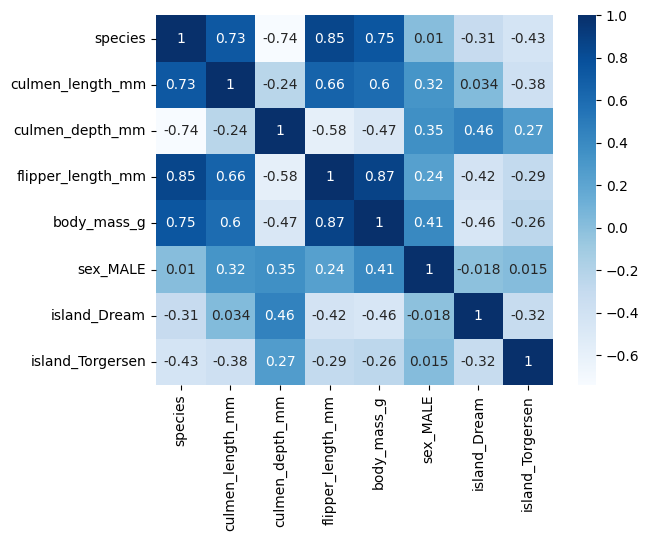

In [27]:
import seaborn as sns

sns.heatmap(new_df_dummy.corr(), annot = True, cmap = 'Blues')

## Dataset final preparation 
We can see the sex attribute does not contribute a lot, so let's drop it.
In addition, we need to drop the species column to form the X, since it will become the targets (or class labels) vector, which we call it Y.

In [28]:
X = new_df_dummy.drop(columns = ['species', 'sex_MALE'])
Y = new_df_dummy['species']

Now it is the time to split the datset for training and testing 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

Let's check the outcome of the splitting in forming the training and the testing sets of samples

In [30]:
print(f"X_train dimensions: {X_train.shape}")
print(f"X_test dimensions: {X_test.shape}")
print(f"Y_train dimensions: {Y_train.shape}")
print(f"Y_test dimensions: {Y_test.shape}")

X_train dimensions: (258, 6)
X_test dimensions: (86, 6)
Y_train dimensions: (258,)
Y_test dimensions: (86,)


In [31]:
print(X_train)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
334          0.512727         0.119048           0.762712     0.465278   
0            0.254545         0.666667           0.152542     0.291667   
74           0.123636         0.523810           0.305085     0.277778   
53           0.360000         0.761905           0.474576     0.375000   
22           0.138182         0.726190           0.288136     0.305556   
..                ...              ...                ...          ...   
83           0.109091         0.750000           0.355932     0.416667   
17           0.378182         0.904762           0.423729     0.500000   
230          0.320000         0.071429           0.711864     0.541667   
98           0.036364         0.357143           0.101695     0.055556   
322          0.549091         0.285714           0.728814     0.631944   

     island_Dream  island_Torgersen  
334         False             False  
0           False              True

## Linear regression

Let's try first linear regression

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train)

pred = LR.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

print('Accuracy : ', accuracy_score(Y_test, pred))
print('F1 Score : ', f1_score(Y_test, pred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0


## Support Vector Machines

Let's try now support vector machines

In [34]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)

pred = svc.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

print('Accuracy : ', accuracy_score(Y_test, pred))
print('F1 Score : ', f1_score(Y_test, pred, average = 'weighted'))
print('Precision : ', precision_score(Y_test, pred , average = 'weighted'))
print('Recall : ', recall_score(Y_test, pred, average = 'weighted'))

Accuracy :  1.0
F1 Score :  1.0
Precision :  1.0
Recall :  1.0


[[39  0  0]
 [ 0 19  0]
 [ 0  0 28]]


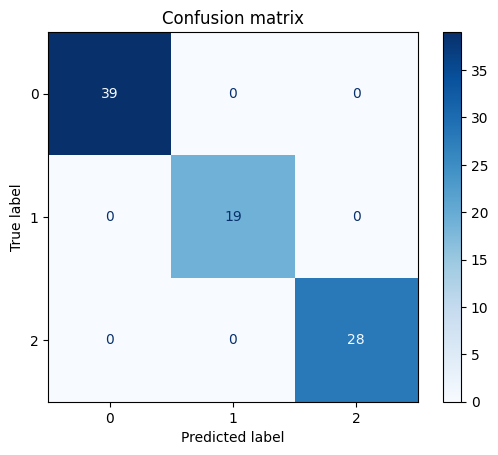

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = np.unique(Y_test)

disp = ConfusionMatrixDisplay.from_estimator(
        svc,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

plt.show()

In [37]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=10, random_state=1)
ppn.fit(X_train, Y_train)

Perceptron(eta0=10, random_state=1)

In [38]:
from sklearn.metrics import accuracy_score

Y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (Y_test != Y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))
print('Accuracy: %.3f' % ppn.score(X_test, Y_test))

Misclassified examples: 0
Accuracy: 1.000
Accuracy: 1.000
